In [1]:
library(ggplot2)
library(ComplexUpset)
library(RColorBrewer)

### yikes need to double check ggplot2 + complexupset compatibility
- https://github.com/tidyverse/ggplot2/issues/5619
- https://github.com/krassowski/complex-upset/issues/195
- https://github.com/krassowski/complex-upset/issues/196

In [2]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /u/local/compilers/intel/2020.4/compilers_and_libraries_2020.4.304/linux/mkl/lib/intel64_lin/libmkl_gf_lp64.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] RColorBrewer_1.1-3 ComplexUpset_1.3.3 ggplot2_3.4.4     

loaded via a namespace (and not attached):
 [1] pillar_1.9.0         compiler_4.1.0       base64enc_0.1-3     
 [4] tools_4.1.0          digest_0.6.35        uuid_1.1-0          
 [7] jsonlite_1.

In [3]:
set_size = function(w, h, factor=1.5) {
    s = 1 * factor
    options(
        repr.plot.width=w * s,
        repr.plot.height=h * s,
        repr.plot.res=100 / factor,
        jupyter.plot_mimetypes='image/png',
        jupyter.plot_scale=1
    )
}

In [4]:
movies = as.data.frame(ggplot2movies::movies)
head(movies, 3)

,title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,⋯,4.5,4.5,,0,0,1,1,0,0,0
2,$1000 a Touchdown,1939,71,NA,6.0,20,0.0,14.5,4.5,24.5,⋯,4.5,14.5,,0,0,1,0,0,0,0
3,$21 a Day Once a Month,1941,7,NA,8.2,5,0.0,0.0,0.0,0.0,⋯,24.5,24.5,,0,1,0,0,0,0,1


In [5]:
genres = colnames(movies)[18:24]
genres

[1] "Action"      "Animation"   "Comedy"      "Drama"       "Documentary"
[6] "Romance"     "Short"

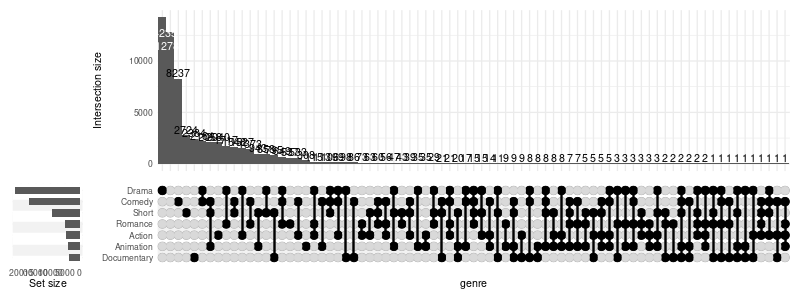

In [6]:
### prayge
set_size(8, 3)
upset(movies, genres, name='genre', width_ratio=0.1)

### now real data

In [7]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'

In [8]:
joint <- read.table(paste0(projdir, 'csv/final_figures/figure4/igvf_joint_upset.csv'), sep='\t', header=1,
                    row.names=1)
assign <- joint$majority

In [9]:
### hopefully doesn't destroy notebook?
colnames(joint)
new_col_names <- gsub('_nogenos', ', no genotypes', colnames(joint))
name_dict <- setNames(new_col_names, colnames(joint))
colnames(joint) <- name_dict[colnames(joint)]
colnames(joint) <- gsub('\\.', ' ', colnames(joint))
colnames(joint)

[1] "RNA.demuxlet"            "ATAC.demuxlet"          
 [3] "RNA.freemuxlet"          "ATAC.freemuxlet"        
 [5] "RNA.vireo"               "ATAC.vireo"             
 [7] "RNA.vireo_nogenos"       "ATAC.vireo_nogenos"     
 [9] "RNA.scsplit"             "ATAC.scsplit"           
[11] "RNA.scsplit_nogenos"     "ATAC.scsplit_nogenos"   
[13] "RNA.souporcell"          "ATAC.souporcell"        
[15] "RNA.souporcell_nogenos"  "ATAC.souporcell_nogenos"
[17] "majority"

[1] "RNA demuxlet"                  "ATAC demuxlet"                
 [3] "RNA freemuxlet"                "ATAC freemuxlet"              
 [5] "RNA vireo"                     "ATAC vireo"                   
 [7] "RNA vireo, no genotypes"       "ATAC vireo, no genotypes"     
 [9] "RNA scsplit"                   "ATAC scsplit"                 
[11] "RNA scsplit, no genotypes"     "ATAC scsplit, no genotypes"   
[13] "RNA souporcell"                "ATAC souporcell"              
[15] "RNA souporcell, no genotypes"  "ATAC souporcell, no genotypes"
[17] "majority"

In [10]:
igvf_palette <- c('#F44336','#5F3EB6','#01B0E7','#71BB4C','#000000')
names(igvf_palette) <- names(table(assign))

nb.cols <- 14
adelus_palette <- colorRampPalette(brewer.pal(8, "Spectral"))(nb.cols)
adelus_palette[14] <- '#000000'

In [11]:
length(colnames(joint))
colnames(joint)

[1] 17

[1] "RNA demuxlet"                  "ATAC demuxlet"                
 [3] "RNA freemuxlet"                "ATAC freemuxlet"              
 [5] "RNA vireo"                     "ATAC vireo"                   
 [7] "RNA vireo, no genotypes"       "ATAC vireo, no genotypes"     
 [9] "RNA scsplit"                   "ATAC scsplit"                 
[11] "RNA scsplit, no genotypes"     "ATAC scsplit, no genotypes"   
[13] "RNA souporcell"                "ATAC souporcell"              
[15] "RNA souporcell, no genotypes"  "ATAC souporcell, no genotypes"
[17] "majority"

In [12]:
joint <- joint[,1:16]
head(joint)

,RNA demuxlet,ATAC demuxlet,RNA freemuxlet,ATAC freemuxlet,RNA vireo,ATAC vireo,"RNA vireo, no genotypes","ATAC vireo, no genotypes",RNA scsplit,ATAC scsplit,"RNA scsplit, no genotypes","ATAC scsplit, no genotypes",RNA souporcell,ATAC souporcell,"RNA souporcell, no genotypes","ATAC souporcell, no genotypes"
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACAGCCAAGGTATA-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AAACAGCCAGCAAATA-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AAACATGCAAACATAG-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AAACATGCAACAGGAT-1_20220928-IGVF-D0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [13]:
table(assign)

assign
     donor1      donor2      donor3      donor4 non_singlet 
       9336        4639        5479        5983        5060 

In [ ]:
# ### what's going on...?
# n = 1000
# tmp_joint <- joint[1:n, 1:3]
# tmp_assign <- assign[1:n]

# cols <- colnames(tmp_joint)
# set_size(4, 4)
# (
#     upset(tmp_joint, cols,
#             themes=upset_default_themes(),
#           sort_sets='descending',
#             base_annotations=list(
#                 'Intersection size'=intersection_size(
#                     counts=FALSE,
#                     mapping=aes(fill=tmp_assign)
#                 )
#             ),
#             name='Droplet type', width_ratio=0.5, wrap=TRUE,
#             set_sizes=FALSE,
#           stripes=c('cornsilk1', 'deepskyblue1'))
#       & theme(plot.background=element_rect(fill='transparent', color=NA))
# )

In [ ]:
cols <- colnames(joint)
set_size(4, 4)
(
    upset(joint, cols,
            themes=upset_default_themes(),
          sort_sets='descending',
            base_annotations=list(
                'Intersection size'=intersection_size(
                    counts=FALSE,
                    mapping=aes(fill=assign)
                )
            ),
            name='Droplet type', width_ratio=0.5, wrap=TRUE,
            set_sizes=FALSE,
          stripes=c('cornsilk1', 'deepskyblue1'))
      & theme(plot.background=element_rect(fill='transparent', color=NA))
)

In [ ]:
### lmao freezing this
stripe_colors = c('cornsilk1', 'deepskyblue1')
cols <- colnames(joint)

options(repr.plot.width=8, repr.plot.height=8)
upset(joint, cols,
      themes=upset_default_themes(),
      sort_sets='descending',
      base_annotations=list(
            'Intersection size'=intersection_size(
                counts=FALSE,
                mapping=aes(fill=assign)) +
                scale_fill_manual(values=igvf_palette) +
                theme(axis.text.y = element_text(size=18, color='black'),
                      axis.title.y = element_text(size=20),
                      panel.grid = element_blank(),
                      legend.position = 'none') + 
                labs(y='# droplets')
        ),
        name='Droplet type', width_ratio=0.5, wrap=TRUE,
        set_sizes=FALSE,
        stripes=upset_stripes(
                    geom=geom_segment(size=8),
                    colors=stripe_colors))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


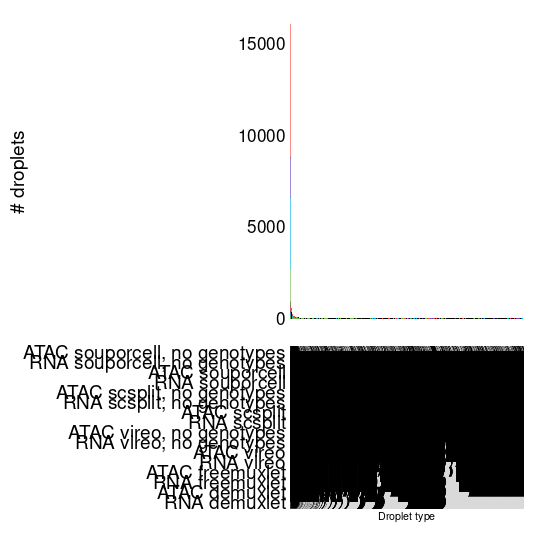

In [14]:
### YES FINALLY!!!
cols <- colnames(joint)
stripe_colors = c('cornsilk1', 'deepskyblue1')

options(repr.plot.width=8, repr.plot.height=8)
upset(joint, cols,
      sort_sets=FALSE,
      themes=upset_default_themes(),
      base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill=assign)) +
            scale_fill_manual(values=igvf_palette) +
            theme(axis.text.y = element_text(size=18, color='black'),
                  axis.title.y = element_text(size=20),
                  panel.grid = element_blank(),
                  legend.position = 'none') + 
            labs(y='# droplets')
            ),
        set_sizes=FALSE,
        stripes=upset_stripes(
                    geom=geom_segment(size=14),
                    colors=stripe_colors),
         matrix=intersection_matrix(
            geom=geom_point(
                size=8)),
        name='Droplet type', width_ratio=0.5, wrap=FALSE
        ) + 
    theme(axis.text.y = element_text(size=20, color='black'),
         panel.grid = element_blank())

In [ ]:
# cols <- c('RNA.demuxlet', 'ATAC.demuxlet',
#           'RNA.freemuxlet', 'ATAC.freemuxlet',
#           'RNA.vireo', 'ATAC.vireo',
#           'RNA.vireo_nogenos', 'ATAC.vireo_nogenos',
#           'RNA.scsplit', 'ATAC.scsplit',
#           'RNA.scsplit_nogenos', 'ATAC.scsplit_nogenos',
#           'RNA.souporcell', 'ATAC.souporcell',
#           'RNA.souporcell_nogenos', 'ATAC.souporcell_nogenos')

In [ ]:
# cols <- c('RNA.demuxlet', 'ATAC.demuxlet',
#           'RNA.freemuxlet', 'ATAC.freemuxlet',
#           'RNA.vireo', 'ATAC.vireo',
#           'RNA.vireo, no genotypes', 'ATAC.vireo, no genotypes',
#           'RNA.scsplit', 'ATAC.scsplit',
#           'RNA.scsplit, no genotypes', 'ATAC.scsplit, no genotypes',
#           'RNA.souporcell', 'ATAC.souporcell',
#           'RNA.souporcell, no genotypes', 'ATAC.souporcell, no genotypes')

In [ ]:
# new_cols = c('RNA demuxlet', 'ATAC demuxlet',
#           'RNA freemuxlet', 'ATAC freemuxlet',
#           'RNA vireo', 'ATAC vireo',
#           'RNA vireo_nogenos', 'ATAC vireo_nogenos',
#           'RNA scsplit', 'ATAC scsplit',
#           'RNA scsplit_nogenos', 'ATAC scsplit_nogenos',
#           'RNA souporcell', 'ATAC souporcell',
#           'RNA souporcell_nogenos', 'ATAC souporcell_nogenos')

In [ ]:
# new_cols = c('RNA demuxlet', 'ATAC demuxlet',
#           'RNA freemuxlet', 'ATAC freemuxlet',
#           'RNA vireo', 'ATAC vireo',
#           'RNA vireo, no genotypes', 'ATAC vireo, no genotypes',
#           'RNA scsplit', 'ATAC scsplit',
#           'RNA scsplit, no genotypes', 'ATAC scsplit, no genotypes',
#           'RNA souporcell', 'ATAC souporcell',
#           'RNA souporcell, no genotypes', 'ATAC souporcell, no genotypes')

In [ ]:
# colnames(joint) <- new_cols

In [ ]:
# cols

In [ ]:
### YES FINALLY!!!
stripe_colors = c('cornsilk1', 'deepskyblue1')

cols <- colnames(joint)
order_cols <- rev(cols)
options(repr.plot.width=8, repr.plot.height=15)
upset(joint, order_cols,
      sort_sets=FALSE,
      themes=upset_default_themes(),
      min_size = 200,
      base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill=assign)) +
            scale_fill_manual(values=igvf_palette) +
            theme(axis.text.y = element_text(size=18, color='black'),
                  axis.title.y = element_text(size=20
                                             ),
                  panel.grid = element_blank(),
                  legend.position = 'none') + 
            labs(y='# droplets')
            ),
        set_sizes=FALSE,
        stripes=upset_stripes(
                    geom=geom_segment(size=5),
                    colors=stripe_colors),
         matrix=intersection_matrix(
            geom=geom_point(
                size=4)),
        name='Droplet type', width_ratio=0.5, wrap=FALSE
        ) + 
    theme(axis.text.y = element_text(size=22, color='black'),
         panel.grid = element_blank())

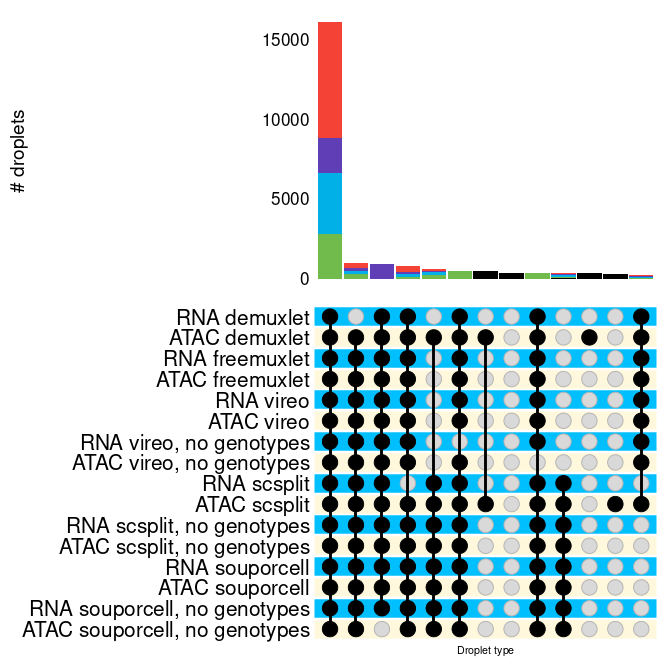

In [18]:
### YES FINALLY!!!
### final plot!
stripe_colors = c('cornsilk1', 'deepskyblue1')

cols <- colnames(joint)
order_cols <- rev(cols)
options(repr.plot.width=10, repr.plot.height=10)
upset(joint, order_cols,
      sort_sets=FALSE,
      themes=upset_default_themes(),
      min_size = 200,
      height_ratio = 1.2,
      base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill=assign)) +
            scale_fill_manual(values=igvf_palette) +
            theme(axis.text.y = element_text(size=18, color='black'),
                  axis.title.y = element_text(size=20
                                             ),
                  panel.grid = element_blank(),
                  legend.position = 'none') + 
            labs(y='# droplets')
            ),
        set_sizes=FALSE,
        stripes=upset_stripes(
                    geom=geom_segment(size=7),
                    colors=stripe_colors),
         matrix=intersection_matrix(
            geom=geom_point(
                size=6)),
        name='Droplet type', width_ratio=0.5, wrap=FALSE
        ) + 
    theme(axis.text.y = element_text(size=22, color='black'),
         panel.grid = element_blank())

### yayyyy let's do adelus now

In [ ]:
joint <- read.table(paste0(projdir, 'csv/final_figures/figure4/adelus_joint_upset.csv'), sep='\t', header=1,
                    row.names=1)
assign <- joint$majority
joint <- joint[,1:16]

In [ ]:
### hopefully doesn't destroy notebook?
colnames(joint)
new_col_names <- gsub('_nogenos', ', no genotypes', colnames(joint))
name_dict <- setNames(new_col_names, colnames(joint))
colnames(joint) <- name_dict[colnames(joint)]
colnames(joint) <- gsub('\\.', ' ', colnames(joint))
colnames(joint)

In [ ]:
head(joint)

In [ ]:
# new_cols = c('RNA demuxlet', 'ATAC demuxlet',
#           'RNA freemuxlet', 'ATAC freemuxlet',
#           'RNA vireo', 'ATAC vireo',
#           'RNA vireo_nogenos', 'ATAC vireo_nogenos',
#           'RNA scsplit', 'ATAC scsplit',
#           'RNA scsplit_nogenos', 'ATAC scsplit_nogenos',
#           'RNA souporcell', 'ATAC souporcell',
#           'RNA souporcell_nogenos', 'ATAC souporcell_nogenos')

In [ ]:
colnames(joint) <- new_cols

In [ ]:
nb.cols <- 14
adelus_palette <- colorRampPalette(brewer.pal(8, "Spectral"))(nb.cols)
adelus_palette[14] <- '#000000'

In [ ]:
table(assign)

In [ ]:
# ### YES FINALLY!!!
# stripe_colors = c('cornsilk1', 'deepskyblue1')

# cols <- colnames(joint)
# order_cols <- rev(cols)
# options(repr.plot.width=8, repr.plot.height=15)
# upset(joint, order_cols,
#       sort_sets=FALSE,
#       themes=upset_default_themes(),
#       min_size = 200,
#       base_annotations=list(
#         'Intersection size'=intersection_size(
#             counts=FALSE,
#             mapping=aes(fill=assign)) +
#             scale_fill_manual(values=adelus_palette) +
#             theme(axis.text.y = element_text(size=18, color='black'),
#                   axis.title.y = element_text(size=20
#                                              ),
#                   panel.grid = element_blank(),
#                   legend.position = 'none') + 
#             labs(y='# droplets')
#             ),
#         set_sizes=FALSE,
#         stripes=upset_stripes(
#                     geom=geom_segment(size=5),
#                     colors=stripe_colors),
#          matrix=intersection_matrix(
#             geom=geom_point(
#                 size=4)),
#         name='Droplet type', width_ratio=0.5, wrap=FALSE
#         ) + 
#     theme(axis.text.y = element_text(size=22, color='black'),
#          panel.grid = element_blank())

In [ ]:
### YES FINALLY!!!
stripe_colors = c('cornsilk1', 'deepskyblue1')

cols <- colnames(joint)
order_cols <- rev(cols)
options(repr.plot.width=10, repr.plot.height=10)
upset(joint, order_cols,
      sort_sets=FALSE,
      themes=upset_default_themes(),
      min_size = 200,
      height_ratio = 1.2,
      base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill=assign)) +
            scale_fill_manual(values=adelus_palette) +
            theme(axis.text.y = element_text(size=18, color='black'),
                  axis.title.y = element_text(size=20
                                             ),
                  panel.grid = element_blank(),
                  legend.position = 'none') + 
            labs(y='# droplets')
            ),
        set_sizes=FALSE,
        stripes=upset_stripes(
                    geom=geom_segment(size=6),
                    colors=stripe_colors),
         matrix=intersection_matrix(
            geom=geom_point(
                size=5)),
        name='Droplet type', width_ratio=0.5, wrap=FALSE
        ) + 
    theme(axis.text.y = element_text(size=22, color='black'),
         panel.grid = element_blank())